In [10]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/simra/Downloads/VideoGamesSales.csv')
# df = df[df.duplicated()]
# df.shape[0]
df = df.drop_duplicates()
df['Region'] = df['Region'].fillna('North')
df['NA_Sales'] = df['NA_Sales'].replace('[$]', '', regex=True)
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'], errors='coerce')
# df.tail(100)

# df= df[df['Region'].isnull()]
# df.shape[0]
Average_Sales = df['NA_Sales'].mean()
Average_Sales=int(Average_Sales)
df['NA_Sales']=df['NA_Sales'].fillna(Average_Sales)

df['Country'] = df['Country'].replace({'United States': 'USA'})
df['Month'] = df['Month'].replace({'October': 'Oct'})
# df['Country'] = df['Country'].str.title()
df=df[df['State'] == 'California']
df = df.rename(columns={'NA_Sales': 'National Sales', 'Global_Sales': 'Global Sales', 'NA_Profit': 'National Profit', 'Global_Profit' : 'Global Profit'})

sales_cap = df['National Sales'].quantile(0.50)
# sales_cap
df['National Sales'] = np.where(df['National Sales']> sales_cap,sales_cap ,df['National Sales'])
# df.head(2)
df


,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,National Sales,Global Sales,National Profit,Global Profit
0,1,Wii Sports,Wii,2010,Jan,Sports,Nintendo,USA,Fairfield,California,West,0.79,82.74,12.447,24.822
14,11,Nintendogs,DS,2010,Nov,Simulation,Nintendo,USA,Los Angeles,California,West,0.79,24.76,2.721,7.428
20,17,Grand Theft Auto V,PS3,2010,May,Action,Take-Two Interactive,USA,San Francisco,California,West,0.79,21.40,2.103,6.420
21,18,Grand Theft Auto: San Andreas,PS2,2010,Jun,Action,Take-Two Interactive,USA,Los Angeles,California,West,0.79,20.81,2.829,6.243
23,20,Brain Age: Train Your Brain in Minutes a Day,DS,2010,Aug,Misc,Nintendo,USA,San Francisco,California,West,0.79,20.22,1.425,6.066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487,2476,Metroid: Zero Mission,GBA,2013,Mar,Adventure,Nintendo,USA,Los Angeles,California,West,0.60,0.84,0.180,0.252
2490,2479,Ben 10: Protector of Earth,PS2,2013,Jun,Action,D3Publisher,USA,Los Angeles,California,West,0.09,0.84,0.027,0.252
2491,2480,Need for Speed Rivals,X360,2013,Jul,Racing,Electronic Arts,USA,San Francisco,California,West,0.37,0.84,0.111,0.252
2495,2484,Dynasty Warriors 2,PS2,2013,Nov,Action,THQ,USA,San Francisco,California,West,0.24,0.83,0.072,0.249


In [4]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


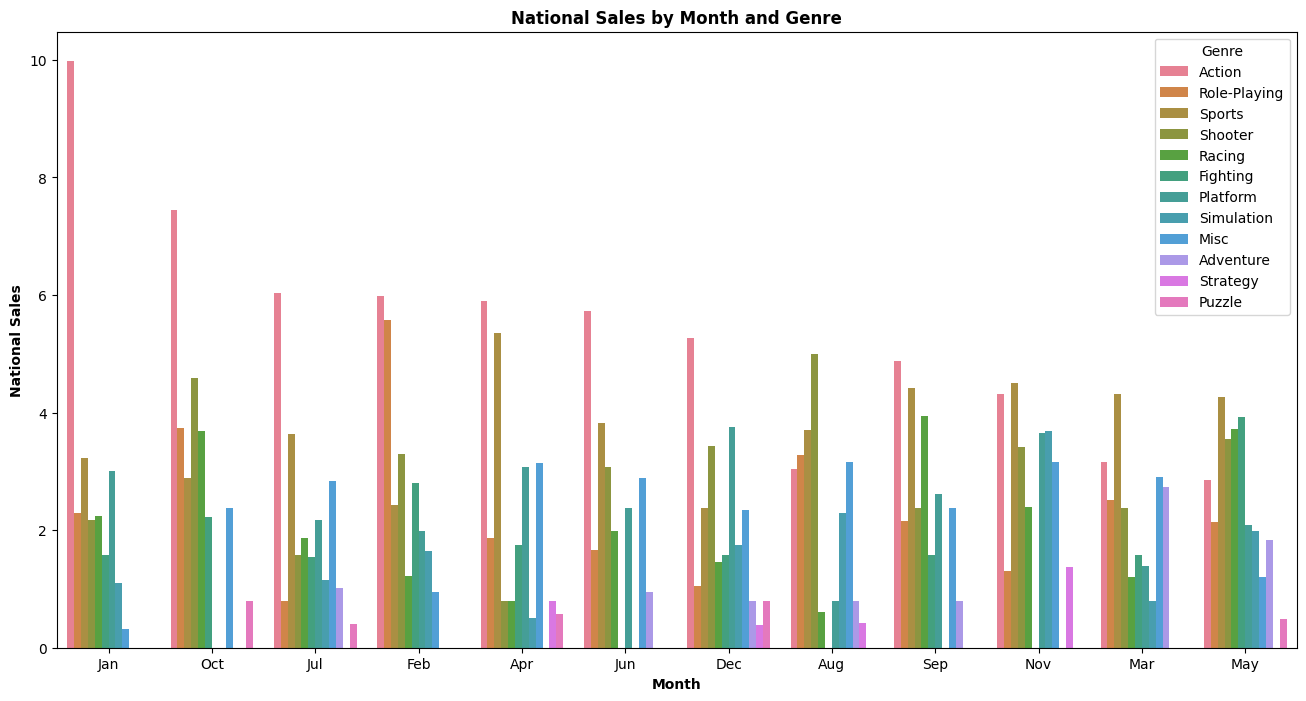

In [12]:
# creating a bar chart

National_Sales = df.groupby(['Month', 'Genre'])['National Sales'].sum().reset_index().sort_values(by='National Sales' , ascending = False)
National_Sales

plt.figure(figsize=(16,8))
sns.barplot(data=National_Sales, x = 'Month', y= 'National Sales', hue= 'Genre')
plt.title('National Sales by Month and Genre', fontweight='bold')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('National Sales', fontweight='bold')
plt.show()


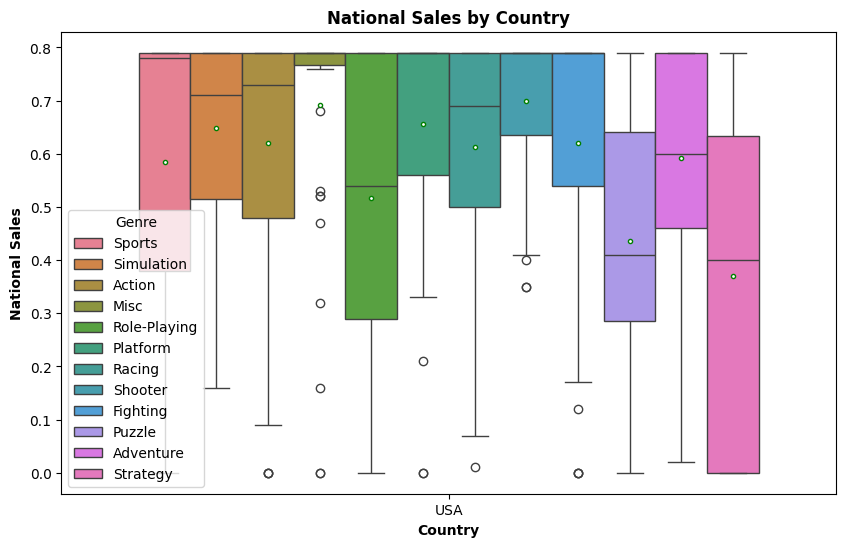

In [13]:
# Create Box Plot

plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y = 'National Sales', data = df ,showmeans=True ,hue = 'Genre', meanprops= {"marker":"o"
                                                                                                    , "markerfacecolor":"white"
                                                                                                     , "markersize":"3"
                                                                                                     , "markeredgecolor": "green"
                                                                                                    })
plt.title('National Sales by Country',fontweight='bold')
plt.xlabel('Country',fontweight='bold')
plt.ylabel('National Sales',fontweight='bold')
plt.show()

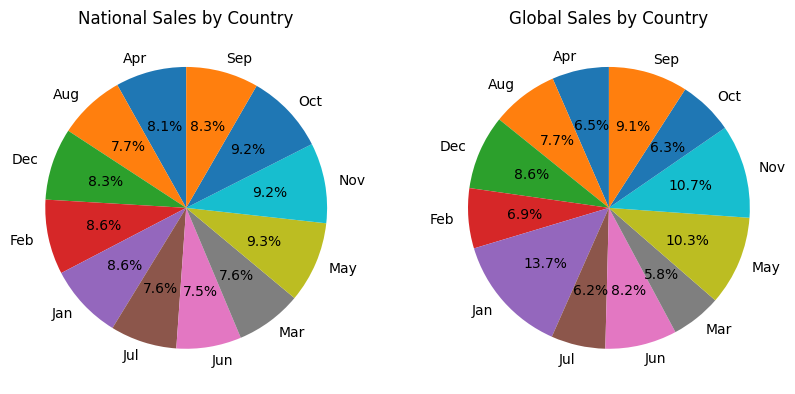

In [14]:
#create a pipe chart


Sales=df.groupby(['Month'])[['National Sales','Global Sales']].sum().reset_index()
Country=Sales['Month']
National_Sales=Sales['National Sales']
Global_Sales=Sales['Global Sales']

fig, axs = plt.subplots(1, 2, figsize=(10, 7))

axs[0].pie(National_Sales, labels=Country, autopct='%1.1f%%', startangle=90)
axs[0].set_title('National Sales by Country')

axs[1].pie(Global_Sales, labels=Country, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Global Sales by Country')

plt.show()
# Country=Sales['State']

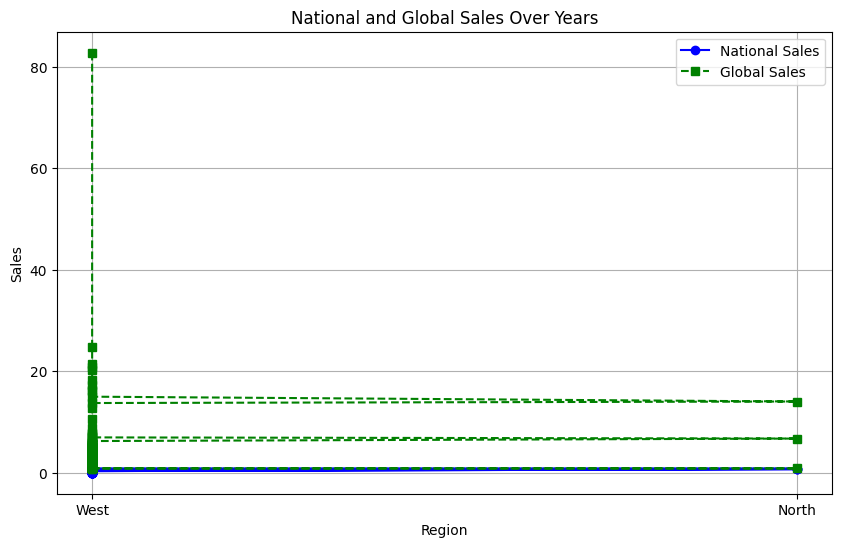

In [15]:
# Create a line chart
plt.figure(figsize=(10, 6))

# Line for National Sales
plt.plot(df['Region'], df['National Sales'], marker='o', linestyle='-', color='b', label='National Sales')

# Line for Global Sales
plt.plot(df['Region'], df['Global Sales'], marker='s', linestyle='--', color='g', label='Global Sales')

# Adding titles and labels
plt.title('National and Global Sales Over Years')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.legend()

# Display the line chart
plt.grid(True)
plt.show()